

Build **kNN** and **logistic regression** classifiers using sklearn library to predict "passed" (label variable) by using given data. 
- Start the project with data processing such as converting non-numeric values to numerical ones,  data normalization, etc.
- Explore and analyze the data using feature visualization such as correlation heatmap, and distribution plots by commenting on your findings. Choose min. 3 features for the visualization step. 
- Then, shuffle and split your data into train and test sets randomly, with a ratio of 70:30. (Write your own shuffling and spliting code, do not use predefined function train_test_split).
- Build your models (with proper comments and explanations) using the training set.
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance.
- Plot confusion matrices for your models over the test set, and comment on the outcomes. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate/comment the prediction performance of each classifier. 

Notes:

* Choose the optimal k value using Minkowski distance (by trying two different p-values) for the kNN model.


* **Don't forget to add comments to your code lines to explain how your program works, and your intentions behind it. Also, do not forget to comment on the outcomes and comparisons.** 

In [386]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
sns.set_style("dark")
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
%matplotlib inline

In [387]:
df = pd.read_csv("data.csv")
df.info() #no nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

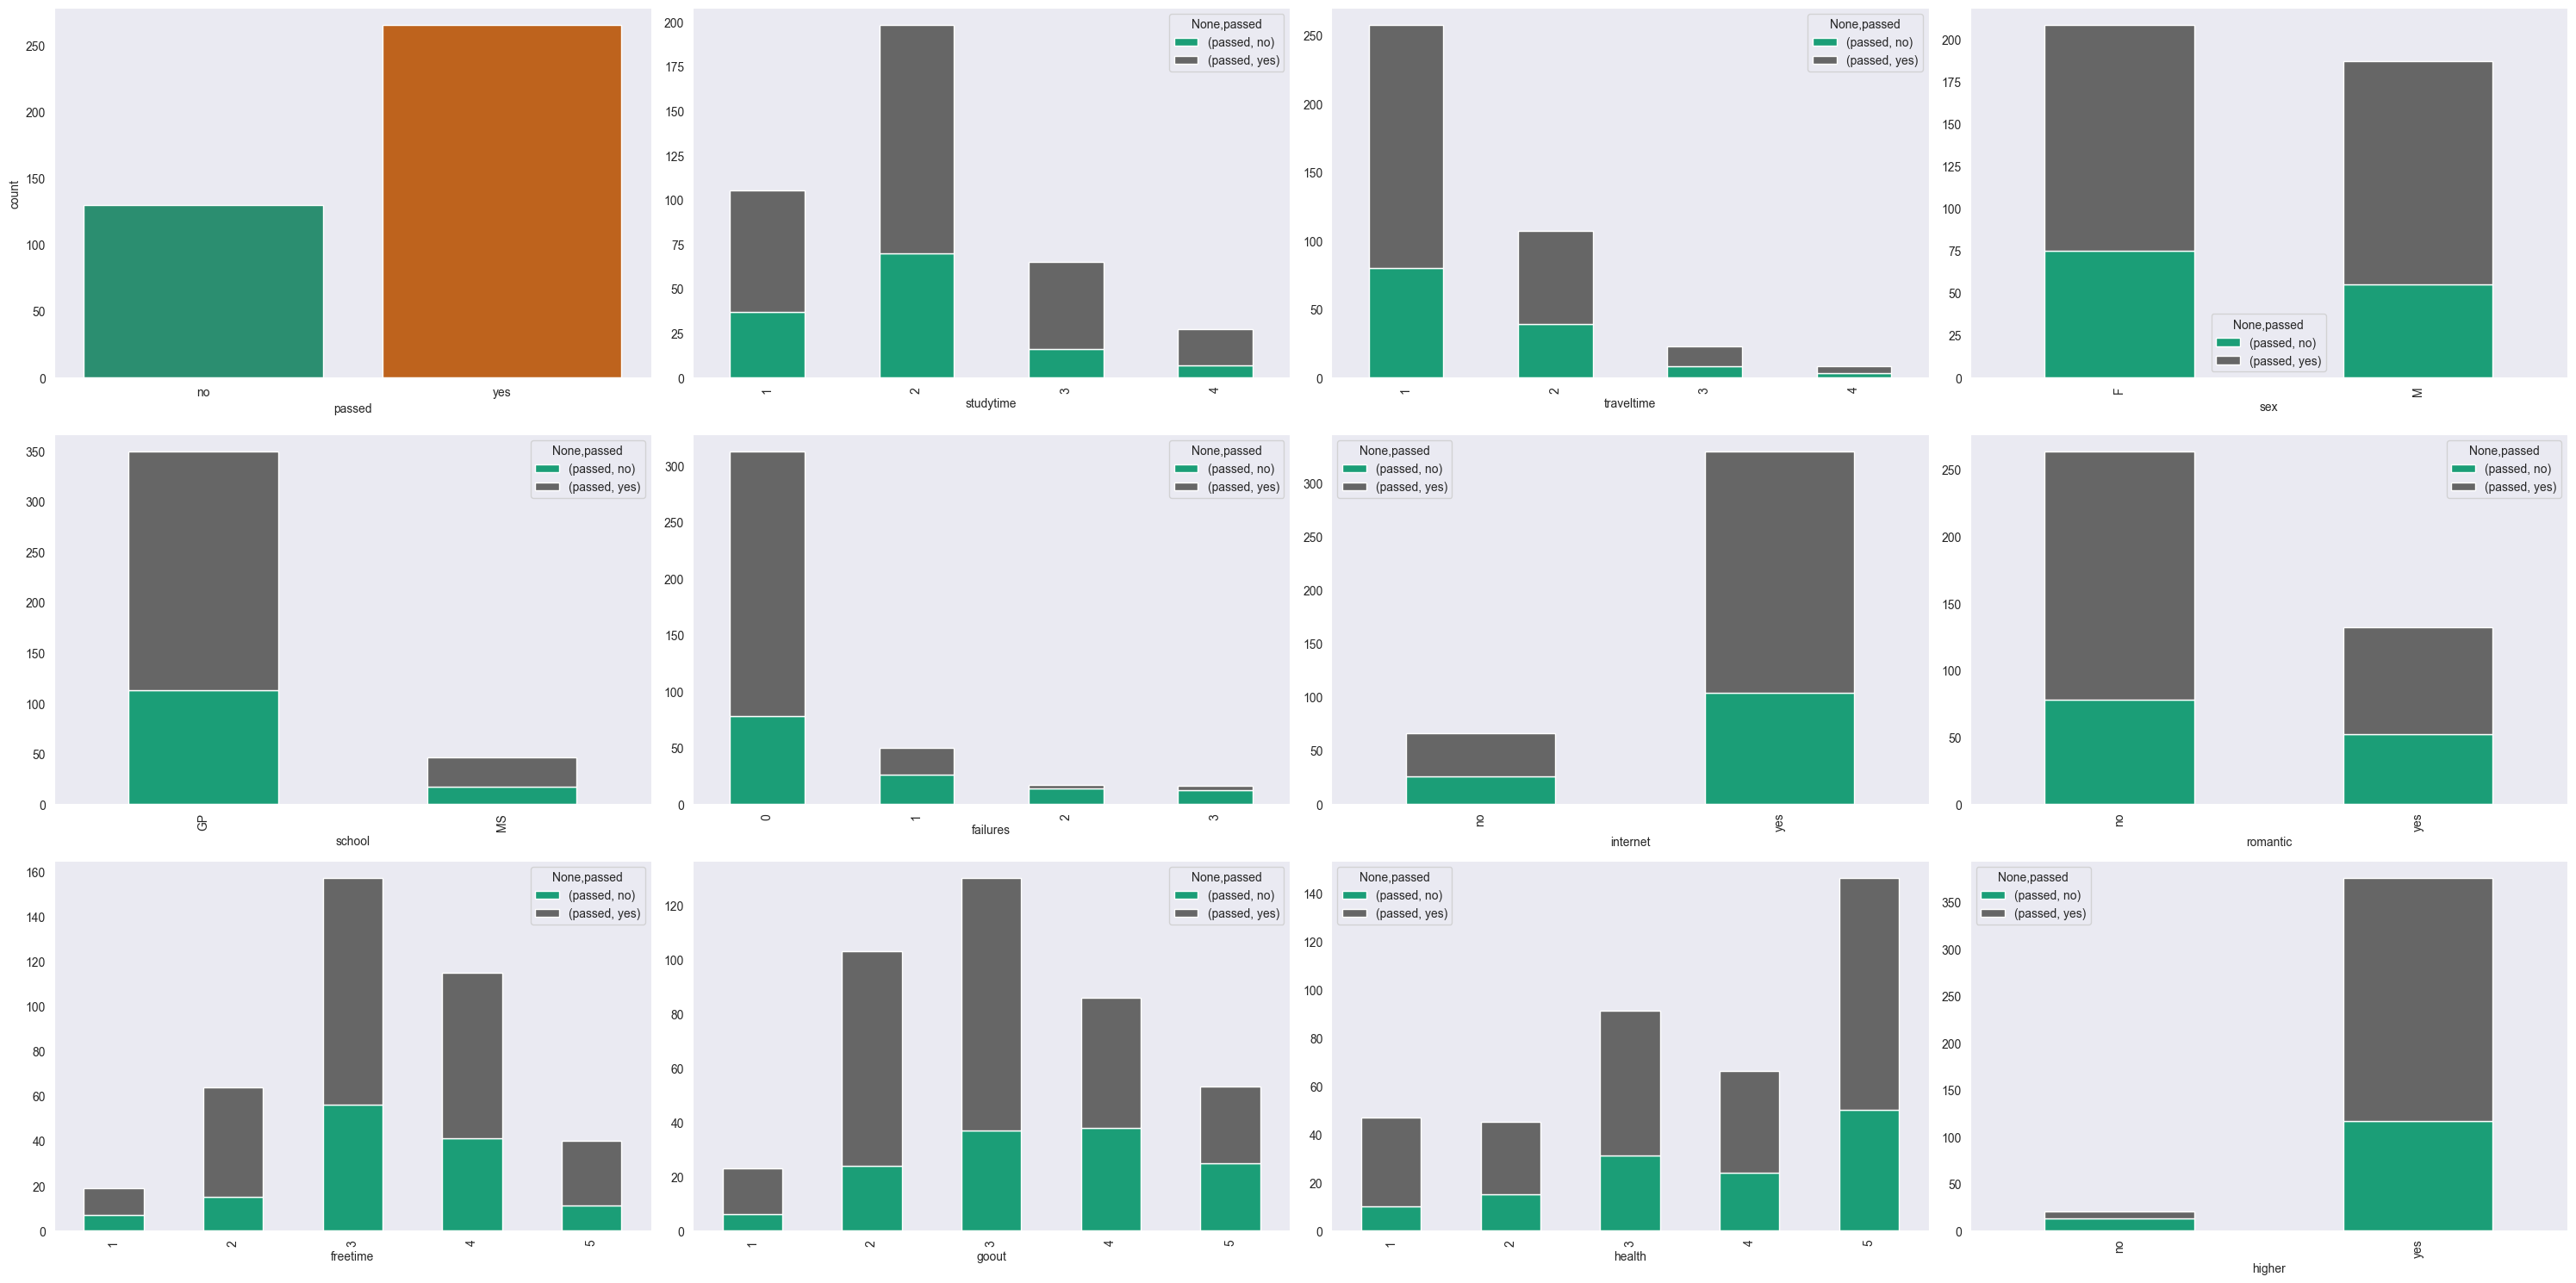

In [388]:
fig, axs = plt.subplots(ncols=4,nrows = 3,figsize = (30,15))
sns.countplot(x='passed', data=df, ax=axs[0][0],palette = "Dark2")
df[["passed","studytime"]].pivot_table(index='studytime', columns=df["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=axs[0][1],colormap="Dark2")
df[["passed","traveltime"]].pivot_table(index='traveltime', columns=df["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=axs[0][2],colormap="Dark2")
df[["passed","sex"]].pivot_table(index='sex', columns=df["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=axs[0][3],colormap="Dark2")
df[["passed","school"]].pivot_table(index='school', columns=df["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=axs[1][0],colormap="Dark2")
df[["passed","failures"]].pivot_table(index='failures', columns=df["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=axs[1][1],colormap="Dark2")
df[["passed","internet"]].pivot_table(index='internet', columns=df["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=axs[1][2],colormap="Dark2")
df[["passed","romantic"]].pivot_table(index='romantic', columns=df["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=axs[1][3],colormap="Dark2")
df[["passed","freetime"]].pivot_table(index='freetime', columns=df["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=axs[2][0],colormap="Dark2")
df[["passed","goout"]].pivot_table(index='goout', columns=df["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=axs[2][1],colormap="Dark2")
df[["passed","health"]].pivot_table(index='health', columns=df["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=axs[2][2],colormap="Dark2")
df[["passed","higher"]].pivot_table(index='higher', columns=df["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=axs[2][3],colormap="Dark2")
plt.tight_layout()
plt.show()

<AxesSubplot: >

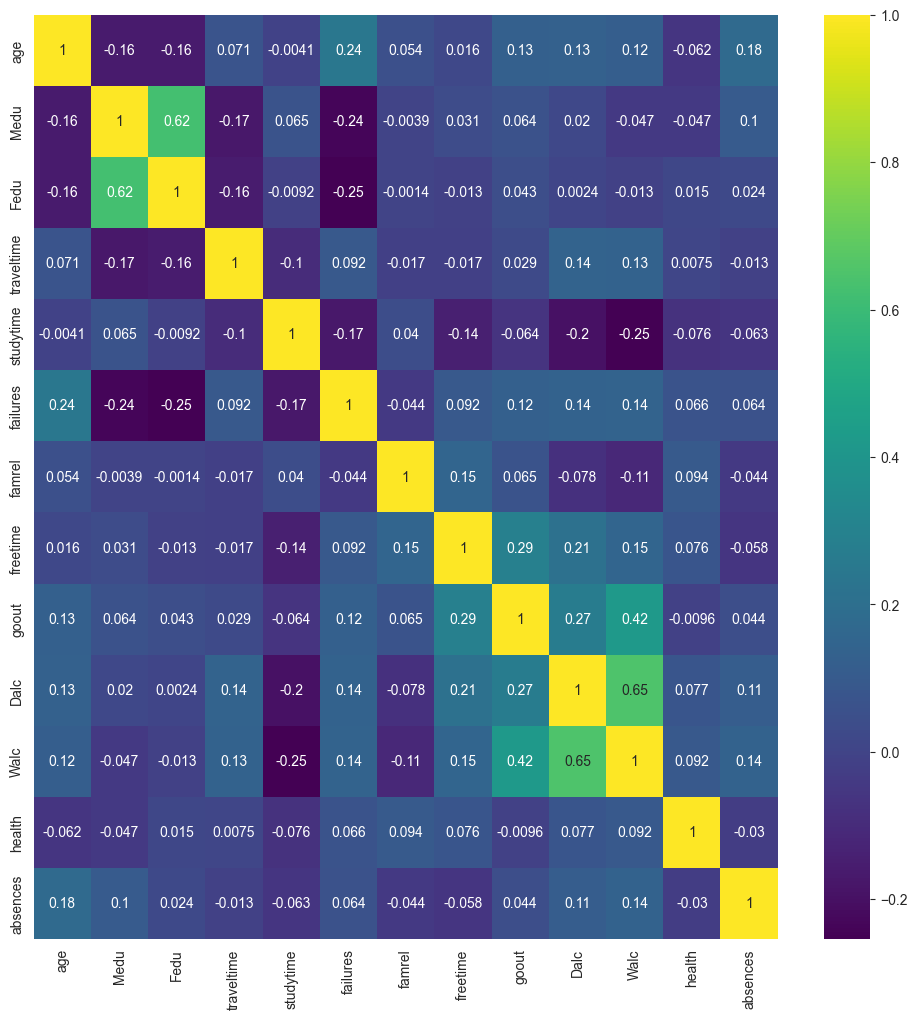

In [389]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [390]:
# binary values to numeric
df["school"].replace(to_replace=['GP', 'MS'], value=[0, 1],inplace=True)
df["sex"].replace(to_replace=['M', 'F'], value=[0, 1],inplace=True)
df["address"].replace(to_replace=['U', 'R'], value=[0, 1],inplace=True)
df["famsize"].replace(to_replace=['LE3', 'GT3'], value=[0, 1],inplace=True)
df["Pstatus"].replace(to_replace=['T', 'A'], value=[0, 1],inplace=True)
df["schoolsup"].replace(to_replace=['yes', 'no'], value=[1, 0],inplace=True)
df["famsup"].replace(to_replace=['yes', 'no'], value=[1, 0],inplace=True)
df["paid"].replace(to_replace=['yes', 'no'], value=[1, 0],inplace=True)
df["activities"].replace(to_replace=['yes', 'no'], value=[1, 0],inplace=True)
df["nursery"].replace(to_replace=['yes', 'no'], value=[1, 0],inplace=True)
df["higher"].replace(to_replace=['yes', 'no'], value=[1, 0],inplace=True)
df["internet"].replace(to_replace=['yes', 'no'], value=[1, 0],inplace=True)
df["romantic"].replace(to_replace=['yes', 'no'], value=[1, 0],inplace=True)
df["passed"].replace(to_replace=['yes', 'no'], value=[1, 0],inplace=True)
#nominal values to one hot encode
df = pd.get_dummies(data=df)


In [391]:
#data scaling
sc = MinMaxScaler()
df[df.columns] = sc.fit_transform(df[df.columns])

In [392]:
import math
shuffle_df = df.sample(frac=1) 
X = np.array(shuffle_df.drop(["passed"],1))
y = np.array(shuffle_df["passed"])
s_f = 0.7
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 276
Total Number of rows in test: 119


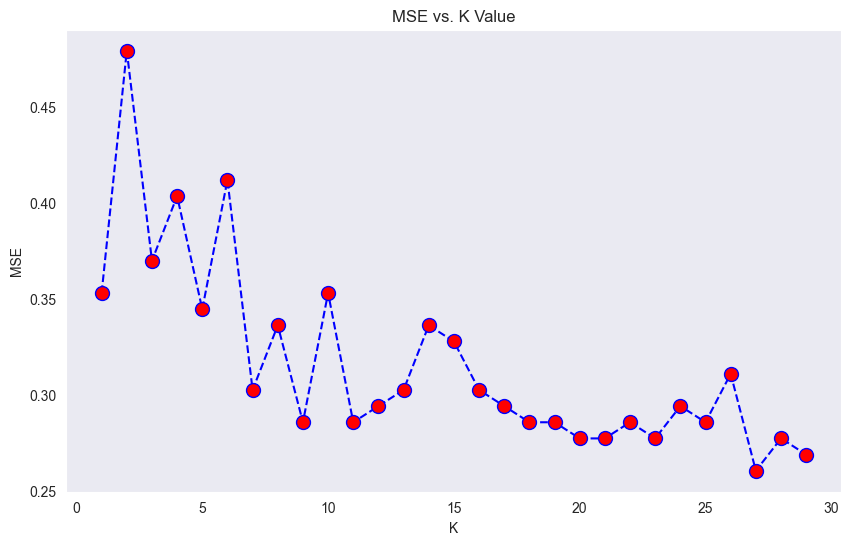

Minimum error:- 0.2605042016806723 at K = 27
Accuracy score:  0.7394957983193278


In [393]:
# knn model for manhattan distance
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i,metric="manhattan")
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(mean_squared_error(pred_i,y_test))
    
k = error_rate.index(min(error_rate)) + 1
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("MSE vs. K Value")
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1)


knn = KNeighborsClassifier(n_neighbors=k,metric="manhattan") ## k = 27
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

### Manhattan distance's accuracy score is %73

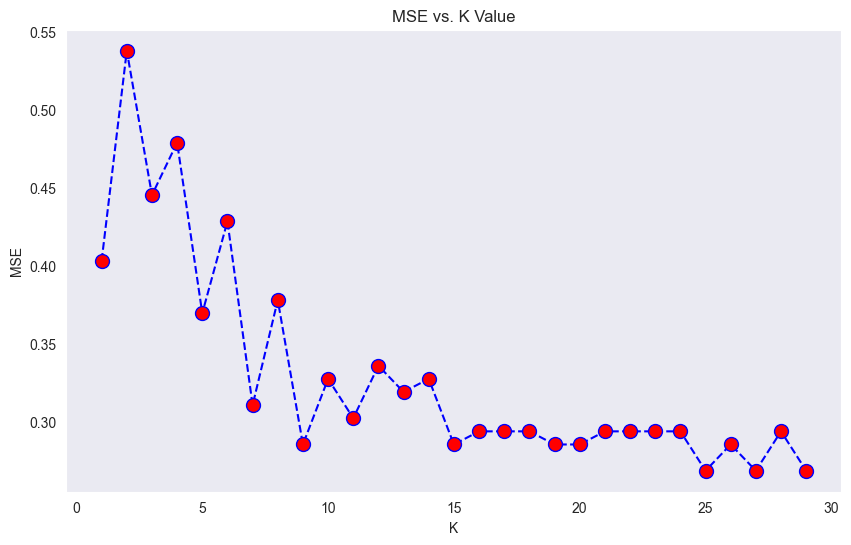

Minimum error:- 0.2689075630252101 at K = 25
Accuracy score:  0.7310924369747899


In [394]:
# knn model for euclidian distance
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(mean_squared_error(pred_i,y_test))
    
k = error_rate.index(min(error_rate)) + 1
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("MSE vs. K Value")
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1)

knn = KNeighborsClassifier(n_neighbors=k) ## k = 25
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))


### Euclidian distance's accuracy score is %73

### Better one is Eucilidan so from now on I will use euclidian distance for this data

Accuracy score:  0.7563025210084033


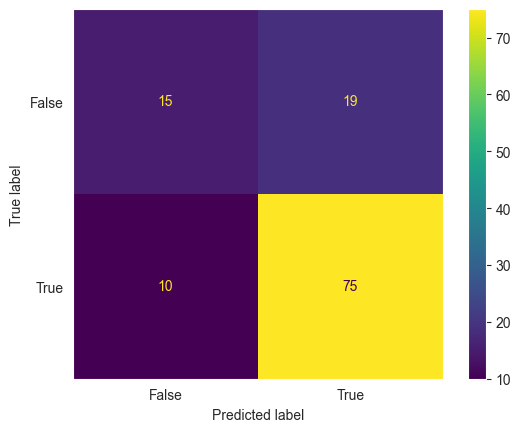

In [395]:
#Logistic Regression

# Fitting logistic regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


# Predicting the test results
y_pred = classifier.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

#confusion matrix for logistic regression 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

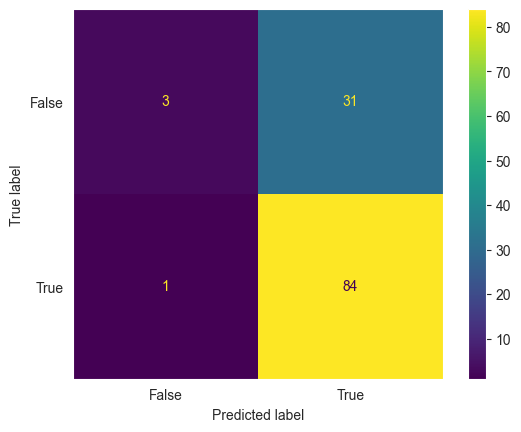

In [396]:

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

#confusion matrix for knn 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Logistic Regression is beter than knn in accuracy and confusion matrix

In [397]:
#presicion scores for knn and logistic regression

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('Precision for knn: %.3f' % precision_score(y_test, y_pred))



classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Precision for logistic regression: %.3f' % precision_score(y_test, y_pred))

Precision for knn: 0.730
Precision for logistic regression: 0.798


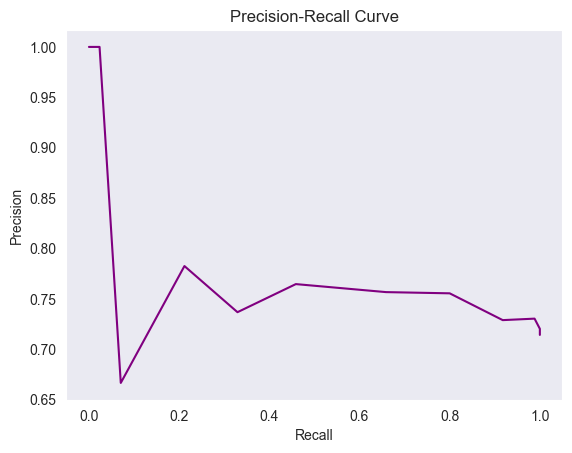

In [398]:
#calculate precision and recall for knn

knn.fit(X_train,y_train)
y_score = knn.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

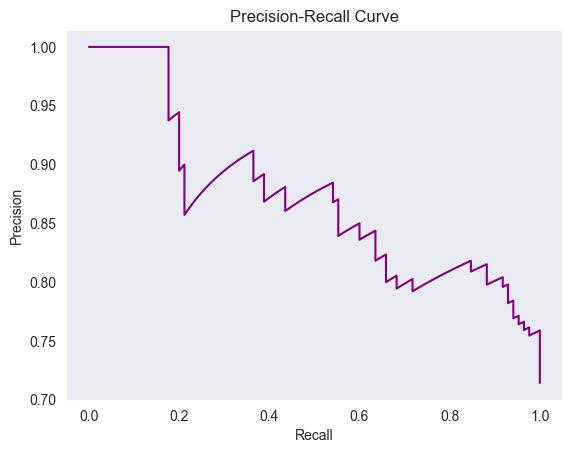

In [399]:
#calculate precision and recall for logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()